Simple classifier based on (binary) HDC with [this dataset](https://www.kaggle.com/datasets/uciml/zoo-animal-classification).
First define operations

In [1]:
using Random

bitHDV(N::Int=10000) = bitrand(N)

function bitadd(vectors::BitVector ...)
    v = reduce(.+, vectors)
    n = length(vectors) / 2
    x = [i > n ? 1 : i < n ? 0 : rand(0:1) for i in v]
    return convert(BitVector, x)
end

bitbind(vectors::BitVector ...) =  reduce(.⊻, vectors)

bitperm(vector::BitVector, k::Int=1) = circshift(vector, k)

hamming(x::BitVector, y::BitVector) = sum(x .!= y)/length(x)

hamming (generic function with 1 method)

In [2]:
using DataFrames, CSV

In [3]:
data = CSV.read("zoo.csv", DataFrame)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,aardvark,1,0,0,1,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1
3,bass,0,0,1,0,0,1,1,1
4,bear,1,0,0,1,0,0,1,1
5,boar,1,0,0,1,0,0,1,1
6,buffalo,1,0,0,1,0,0,0,1
7,calf,1,0,0,1,0,0,0,1
8,carp,0,0,1,0,0,1,0,1
9,catfish,0,0,1,0,0,1,1,1


In [4]:
classls = data.class_type

101-element Vector{Int64}:
 1
 1
 4
 1
 1
 1
 1
 4
 4
 1
 1
 2
 4
 ⋮
 5
 3
 3
 4
 1
 1
 2
 1
 6
 1
 7
 2

In [5]:
mammal_idx = [i for i in 1:101 if data.class_type[i] == 1]
bird_idx = [i for i in 1:101 if data.class_type[i] == 2]
reptile_idx = [i for i in 1:101 if data.class_type[i] == 3]
fish_idx = [i for i in 1:101 if data.class_type[i] == 4]
amphibian_idx = [i for i in 1:101 if data.class_type[i] == 5]
bug_idx = [i for i in 1:101 if data.class_type[i] == 6]
invertebrate_idx = [i for i in 1:101 if data.class_type[i] == 7]

10-element Vector{Int64}:
  14
  15
  16
  47
  54
  73
  78
  82
  86
 100

In [6]:
indices = [mammal_idx, bird_idx, reptile_idx, fish_idx, amphibian_idx, bug_idx, invertebrate_idx]

7-element Vector{Vector{Int64}}:
 [1, 2, 4, 5, 6, 7, 10, 11, 18, 20  …  69, 70, 71, 75, 76, 85, 94, 95, 97, 99]
 [12, 17, 21, 22, 24, 34, 38, 42, 44, 57, 58, 59, 60, 72, 79, 80, 84, 88, 96, 101]
 [63, 77, 81, 91, 92]
 [3, 8, 9, 13, 19, 35, 39, 61, 62, 74, 83, 87, 93]
 [26, 27, 53, 90]
 [25, 31, 40, 41, 43, 52, 89, 98]
 [14, 15, 16, 47, 54, 73, 78, 82, 86, 100]

In [7]:
legs0 = [i == 0 ? 1 : 0 for i in data.legs]
legs2 = [i == 2 ? 1 : 0 for i in data.legs]
legs4 = [i == 4 ? 1 : 0 for i in data.legs]
legs5 = [i == 5 ? 1 : 0 for i in data.legs]
legs6 = [i == 6 ? 1 : 0 for i in data.legs]
legs8 = [i == 8 ? 1 : 0 for i in data.legs]

101-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [8]:
select!(data, Not(:class_type))
select!(data, Not(:legs))
data[!, :legs0] = legs0
data[!, :legs2] = legs2
data[!, :legs4] = legs4
data[!, :legs5] = legs5
data[!, :legs6] = legs6
data[!, :legs8] = legs8
data


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed
,String15,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,aardvark,1,0,0,1,0,0,1,1
2,antelope,1,0,0,1,0,0,0,1
3,bass,0,0,1,0,0,1,1,1
4,bear,1,0,0,1,0,0,1,1
5,boar,1,0,0,1,0,0,1,1
6,buffalo,1,0,0,1,0,0,0,1
7,calf,1,0,0,1,0,0,0,1
8,carp,0,0,1,0,0,1,0,1
9,catfish,0,0,1,0,0,1,1,1


In [9]:
class_data = CSV.read("class.csv", DataFrame)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
,Int64,Int64,String15,String
1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby, wolf"
2,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren"
3,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna"
5,5,4,Amphibian,"frog, frog, newt, toad"
6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp"
7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm"


In [10]:
function range_hdvs(steps)
	k = length(steps) - 1
	V = [bitHDV() for i in 1:k+1]
	for i in 2:k+1
		for j in 1:10000
			V[i][j] = rand(0:1)
		end
	end
	return V
end

range_hdvs (generic function with 1 method)

Create semi random HDV for legs range

In [11]:
legs_steps = 0:1:8
legs_hdvs = range_hdvs(legs_steps)

9-element Vector{BitVector}:
 [0, 1, 1, 0, 0, 0, 1, 1, 1, 1  …  0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
 [1, 1, 0, 0, 1, 1, 1, 1, 1, 1  …  1, 0, 1, 1, 1, 0, 1, 0, 1, 0]
 [1, 1, 0, 1, 1, 1, 0, 1, 0, 1  …  1, 1, 0, 1, 0, 0, 0, 1, 1, 1]
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 1  …  1, 0, 0, 1, 1, 1, 0, 1, 1, 1]
 [0, 1, 0, 1, 0, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
 [0, 1, 0, 0, 1, 0, 1, 0, 1, 1  …  1, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 1, 0, 1, 0, 0, 1, 0, 0, 1  …  0, 1, 0, 1, 1, 0, 0, 0, 0, 1]
 [1, 1, 0, 1, 0, 1, 0, 1, 0, 1  …  1, 0, 0, 0, 1, 0, 0, 1, 1, 0]
 [1, 0, 1, 1, 1, 1, 1, 1, 1, 1  …  0, 1, 1, 0, 0, 0, 0, 0, 1, 1]

In [12]:
feature_hdv=[bitHDV() for i in 1:15]
append!(feature_hdv, [legs_hdvs[1], legs_hdvs[3], legs_hdvs[5], legs_hdvs[6], legs_hdvs[7], legs_hdvs[9]])

21-element Vector{BitVector}:
 [1, 1, 1, 0, 0, 0, 1, 1, 0, 0  …  1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
 [1, 0, 1, 1, 0, 1, 1, 1, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0  …  0, 0, 1, 1, 0, 1, 0, 1, 1, 1]
 [1, 0, 1, 0, 1, 1, 0, 1, 1, 1  …  1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
 [0, 0, 1, 1, 0, 1, 1, 0, 0, 1  …  1, 1, 0, 1, 1, 1, 0, 0, 1, 1]
 [1, 0, 0, 1, 1, 1, 1, 0, 0, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 1  …  1, 0, 1, 1, 1, 0, 0, 0, 0, 1]
 [1, 1, 0, 0, 1, 1, 0, 0, 0, 1  …  1, 1, 0, 1, 1, 1, 0, 1, 1, 0]
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 1, 1, 1, 0, 0, 0, 1, 0, 1]
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 1  …  0, 1, 0, 1, 0, 1, 1, 1, 1, 0]
 [0, 1, 0, 1, 0, 0, 0, 1, 1, 1  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
 [1, 0, 0, 0, 0, 1, 1, 1, 1, 0  …  0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
 [0, 1, 1, 1, 1, 1, 1, 0, 1, 0  …  1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
 [1, 1, 0, 1, 0, 0, 1, 0, 1, 1  …  0, 1, 0, 0, 1, 0, 1, 0, 0

In [13]:
growth_hdv = bitHDV()
skin_protection = bitHDV()
limbs = bitHDV()

10000-element BitVector:
 0
 0
 1
 0
 0
 1
 0
 0
 0
 0
 1
 0
 0
 ⋮
 0
 1
 1
 0
 1
 0
 1
 1
 1
 1
 1
 0

In [14]:
for i in 1:2
    feature_hdv = replace!(feature_hdv, feature_hdv[i] => bitbind(feature_hdv[i], skin_protection))
end

for i in 3:4
    feature_hdv = replace!(feature_hdv, feature_hdv[i] => bitbind(feature_hdv[i], growth_hdv))
end

for i in 13;16:21
    feature_hdv = replace!(feature_hdv, feature_hdv[i] => bitbind(feature_hdv[i], limbs))
end

In [15]:
Mammal = split(class_data.Animal_Names[1], ", ")
Bird = split(class_data.Animal_Names[2], ", ")
Reptile = split(class_data.Animal_Names[3], ", ")
Fish = split(class_data.Animal_Names[4], ", ")
Amphibian = split(class_data.Animal_Names[5], ", ")
Bug = split(class_data.Animal_Names[6], ", ")
Invertebrate = split(class_data.Animal_Names[7], ", ")

10-element Vector{SubString{String}}:
 "clam"
 "crab"
 "crayfish"
 "lobster"
 "octopus"
 "scorpion"
 "seawasp"
 "slug"
 "starfish"
 "worm"

Bundle for every species all of its containing feature HDVs to create a new HDV representing the species. We also have to make sure to consider the non-binary legs feature. 

In [16]:
hdv = BitVector[]
for i in 1:101
    v = BitVector[]
    for j in 2:22
        if data[!, j][i] == 1
            push!(v, feature_hdv[j-1])
        end
    end
    x = bitadd(v...)
    push!(hdv, x)
end

data[!, :species_hdv] = hdv


101-element Vector{BitVector}:
 [0, 1, 0, 1, 1, 0, 1, 0, 1, 1  …  1, 0, 1, 1, 1, 1, 0, 1, 0, 0]
 [0, 0, 1, 0, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 0, 0, 0, 1, 1, 0]
 [0, 1, 1, 1, 1, 0, 0, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 0, 1, 1]
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
 [1, 1, 1, 0, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 0, 1, 0, 1, 0, 1, 1, 0]
 [0, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
 [1, 1, 1, 1, 1, 0, 0, 1, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 0, 1, 0, 1, 1, 0]
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
 [0, 1, 1, 1, 1, 0, 1, 1, 1, 0  …  1, 1, 0, 1, 0, 0, 0, 1, 1, 0]
 [1, 1, 0, 1, 1, 0, 1, 0, 1, 1  …  1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
 ⋮
 [0, 1, 1, 1, 1, 0, 1, 0, 0, 1  …  1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
 [0, 1, 1, 1, 1, 0, 1, 0, 1, 0  …  1, 1, 1, 0, 0, 0, 1, 

Let's bundle all animals of a group into a HDV representing the group.

In [17]:
function grouper(group::Vector)
    v = BitVector[]
    for i in 1:101
        if data.animal_name[i] in group
            push!(v, data.species_hdv[i])
        end
    end
        x = bitadd(v...)
        return x
    end

grouper (generic function with 1 method)

In [18]:
mammal_hdv = grouper(Mammal)
bird_hdv = grouper(Bird)
reptile_hdv = grouper(Reptile)
fish_hdv = grouper(Fish)
amphibian_hdv = grouper(Amphibian)
bug_hdv = grouper(Bug)
invertebrate_hdv = grouper(Invertebrate)

list_group_hdvs = [mammal_hdv, bird_hdv, reptile_hdv, fish_hdv, amphibian_hdv, bug_hdv, invertebrate_hdv]
matrix_groups = permutedims(hcat(list_group_hdvs...))

7×10000 BitMatrix:
 0  0  1  1  1  0  1  0  1  1  1  0  0  …  0  1  1  1  1  1  1  0  0  1  1  1
 0  1  1  1  1  0  1  0  1  0  1  1  1     0  1  1  1  0  1  0  0  0  1  1  1
 0  1  1  1  1  0  1  0  1  1  1  0  1     0  1  1  1  1  1  0  0  0  1  1  0
 1  1  1  1  1  0  0  0  1  1  1  0  0     0  1  1  1  1  1  1  0  0  1  0  1
 0  1  0  1  1  0  1  0  0  1  1  0  1     0  1  1  1  1  1  1  1  0  1  1  1
 0  0  1  1  0  0  1  0  0  0  1  0  1  …  0  1  0  1  0  1  1  1  1  0  0  0
 0  1  0  1  1  0  1  0  1  1  1  0  1     0  1  0  1  1  1  1  0  0  0  0  1

Let's compare the HDV of the flamingo to the HDVs of every animal group. 

In [19]:
println("mammal ",string(hamming(data.species_hdv[24], mammal_hdv)))
println("bird ",string(hamming(data.species_hdv[24], bird_hdv)))
println("reptile ",string(hamming(data.species_hdv[24], reptile_hdv)))
println("amphibian ",string(hamming(data.species_hdv[24], amphibian_hdv)))
println("bug ",string(hamming(data.species_hdv[24], bug_hdv)))
println("fish ",string(hamming(data.species_hdv[24], fish_hdv)))
println("invertebrate ",string(hamming(data.species_hdv[24], invertebrate_hdv)))

mammal 0.3444
bird 0.1279
reptile 0.3138
amphibian 0.3654
bug 0.3427
fish 0.3512
invertebrate 0.3857


Like expected, the flamingo shows most similarity to the bird group! Let's try the animal vampire since I'm not sure what's ment by this...

In [20]:
println("mammal ",string(hamming(data.species_hdv[94], mammal_hdv)))
println("bird ",string(hamming(data.species_hdv[94], bird_hdv)))
println("reptile ",string(hamming(data.species_hdv[94], reptile_hdv)))
println("amphibian ",string(hamming(data.species_hdv[94], amphibian_hdv)))
println("bug ",string(hamming(data.species_hdv[94], bug_hdv)))
println("fish ",string(hamming(data.species_hdv[94], fish_hdv)))
println("invertebrate ",string(hamming(data.species_hdv[94], invertebrate_hdv)))

mammal 0.2424
bird 0.2873
reptile 0.3192
amphibian 0.3604
bug 0.3665
fish 0.3744
invertebrate 0.4633


Let's try to determine the class of an animal not present in the dataset, such as the axolotl.

In [21]:
axolotl_features = [0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]

21-element Vector{Int64}:
 0
 0
 1
 0
 0
 1
 0
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0
 1
 0
 0
 0

Let's construct the total HDV representing the axolotl

In [22]:
v = BitVector[]
    for j in 1:16
        if axolotl_features[j] == 1
            push!(v, feature_hdv[j])
        end
    end
    axolotl_hdv = bitadd(v...)

10000-element BitVector:
 1
 0
 1
 1
 1
 0
 1
 0
 1
 0
 1
 0
 0
 ⋮
 0
 1
 1
 1
 0
 1
 1
 0
 0
 1
 1
 1

Let's find out what kind of aninal an axolotl is...

In [23]:
println("mammal ",string(hamming(axolotl_hdv, mammal_hdv)))
println("bird ",string(hamming(axolotl_hdv, bird_hdv)))
println("reptile ",string(hamming(axolotl_hdv, reptile_hdv)))
println("amphibian ",string(hamming(axolotl_hdv, amphibian_hdv)))
println("bug ",string(hamming(axolotl_hdv, bug_hdv)))
println("fish ",string(hamming(axolotl_hdv, fish_hdv)))
println("invertebrate ",string(hamming(axolotl_hdv, invertebrate_hdv)))

mammal 0.3202
bird 0.2815
reptile 0.2232
amphibian 0.2296
bug 0.3665
fish 0.2464
invertebrate 0.3395


It seems to have a lot of similarities to fish, reptiles and amphibians due to it's unusual features but we're pretty close to amphibian considering the simplicity of this classifier!

In [24]:
using MultivariateStats

M = fit(PCA, matrix_groups ; maxoutdim=2)
proj = projection(M)

7×2 Matrix{Float64}:
 -0.345994  -0.331024
 -0.357785   0.251302
 -0.45496   -0.223469
 -0.388126  -0.3244
 -0.427494  -0.143324
 -0.277742   0.756491
 -0.36709    0.281561

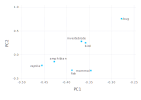

In [25]:
using Gadfly
Gadfly.plot(x=proj[:, 1], y=proj[:, 2], label = ["mammal", "bird", "reptile", "fish", "amphibian", "bug", "invertebrate"], Geom.point, Geom.label, Guide.xlabel("PC1"), Guide.ylabel("PC2"))

In [26]:
matrix_species = permutedims(hcat(hdv...))

S = fit(PCA, matrix_species ; maxoutdim=2)
projS = projection(S)

101×2 Matrix{Float64}:
 -0.107433    0.10177
 -0.113597    0.118186
 -0.0914414  -0.090014
 -0.109131    0.100306
 -0.133231    0.127773
 -0.113823    0.115823
 -0.118713    0.126918
 -0.0793093  -0.0735002
 -0.0898007  -0.0922262
 -0.0983679   0.108052
 -0.133231    0.127773
 -0.0842855  -0.108452
 -0.0896402  -0.0903001
  ⋮          
 -0.0887354  -0.0341722
 -0.0951448  -0.00927394
 -0.116532   -0.0239391
 -0.102302   -0.0810852
 -0.0993242   0.0277266
 -0.118165    0.11768
 -0.103745   -0.113349
 -0.106571    0.0654989
 -0.0542602  -0.0644244
 -0.133231    0.127773
 -0.062854   -0.101607
 -0.0954138  -0.136903

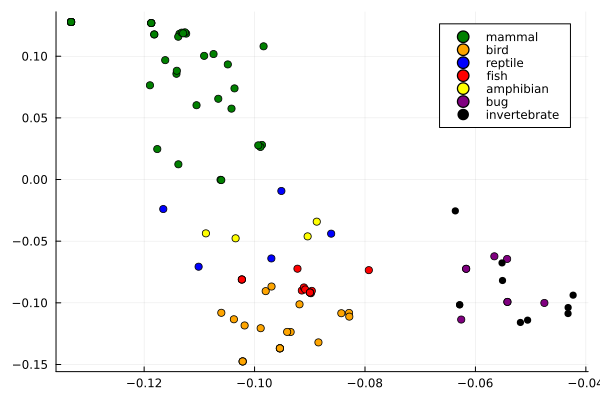

In [27]:
using Plots

function plotter()
    colors = [:green, :orange, :blue, :red, :yellow, :purple, :black]
    labels = ["mammal", "bird", "reptile", "fish", "amphibian", "bug", "invertebrate"]
    fig = Plots.plot()

    for i in 1:7
        scatter!(fig, projS[indices[i], 1], projS[indices[i], 2], mc = colors[i], label=labels[i])
    end
    return fig
end

plotter()
